In [831]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import os
import numpy as np


In [832]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)
    print(X_t[:5])
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud', s=2)
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud', s=2)
    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();



In [833]:
raw_data = pd.read_csv("creditcard.csv")
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [834]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [835]:
raw_data.loc[:,'Time'] = raw_data['Time'].apply(lambda x : x / 3600 % 24)

In [836]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,14.537951,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,5.847061,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,10.598194,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,15.010833,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,19.329722,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,23.999444,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [837]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


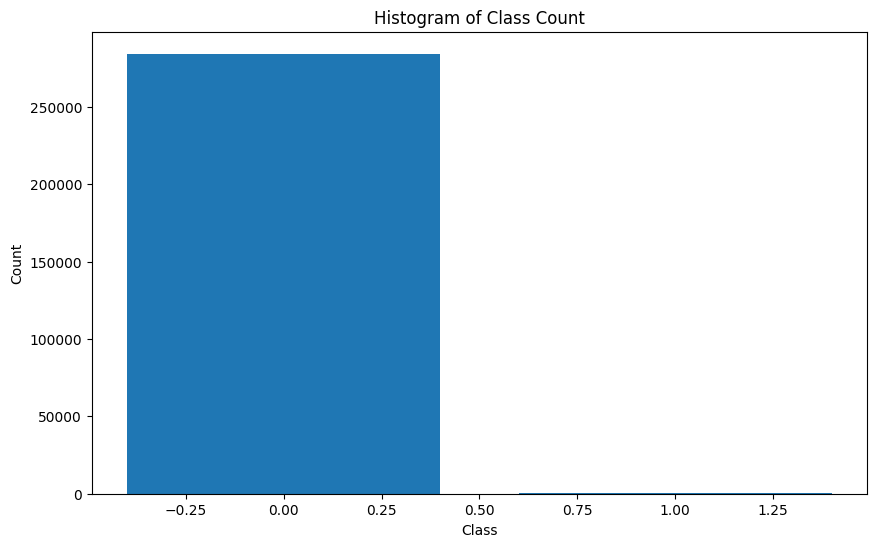

In [838]:
import matplotlib.pyplot as plt

# Assuming 'class' is the column name containing the classes
class_counts = raw_data['Class'].value_counts()
print(class_counts)
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class Count')
plt.show()


In [839]:
nonfraud = raw_data[raw_data['Class']==0].sample(1000)
fraud = raw_data[raw_data['Class']==1]

print(nonfraud.shape , fraud.shape)

df = pd.concat([nonfraud,fraud]).sample(frac=1).reset_index(drop=True)




# final = np.concatenate([nonfraud,fraud])
Y = df['Class']
final1 = df.drop(['Class'],axis=1)


final1.shape

(1000, 31) (492, 31)


(1492, 30)

[[ 32.113598  25.24704 ]
 [-32.11249   16.027699]
 [ -8.289762  35.85411 ]
 [ 29.977894  33.129173]
 [ 43.766075  18.88759 ]]


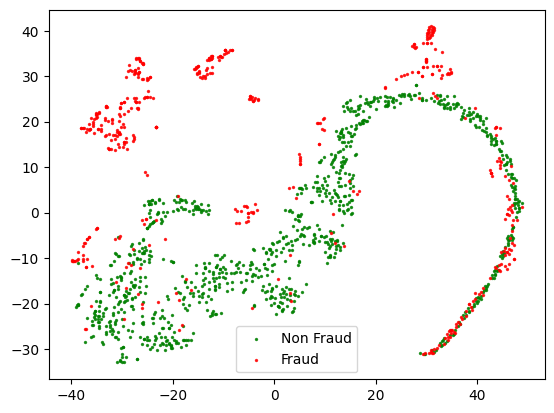

In [840]:

tsne_plot(final1 ,Y)

In [841]:
y = raw_data['Class']
rawdata = raw_data.drop(["Class"],axis=1)

In [842]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [843]:
data, data_test ,y_train,y_test= train_test_split(rawdata,y, test_size=0.25)

In [844]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data_test = scaler.transform(data_test)


In [845]:
data1 = pd.DataFrame(data)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.607075,1.083146,-0.006436,-1.002636,0.081732,0.405666,-0.257094,0.138847,-0.198169,0.407757,...,-0.148568,-0.450829,-1.129276,0.446112,0.091520,-0.286488,0.424731,-0.173212,-0.178914,-0.344905
1,0.308146,1.010138,-0.013446,-1.134144,0.339170,0.189874,-0.703737,0.162539,-0.178089,0.531828,...,-0.148751,-0.457280,-1.378898,0.526350,1.028834,-0.594945,0.336744,-0.183683,-0.071107,-0.172221
2,0.918103,-0.243083,0.378708,-0.246107,-1.104219,2.156496,2.254650,0.368096,0.642912,-0.690254,...,0.017304,-0.000448,-0.304202,-0.377181,1.694216,0.285254,0.420842,0.103295,0.336041,-0.335422
3,0.219740,-1.367829,-0.782338,0.920928,-0.635197,1.540857,-0.249080,-0.540750,0.129387,0.627476,...,-0.795036,0.024076,0.592473,-1.540142,-2.150579,1.727568,-0.271962,-0.774599,1.541355,-0.231456
4,1.572191,0.044197,0.604383,-0.214612,-0.452955,0.696188,-0.371164,0.703228,0.034852,-0.319801,...,0.040062,-0.369800,-0.902810,0.161330,1.004555,-0.910463,0.188759,0.550967,0.229422,-0.342930


In [846]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,...,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05
mean,2.682768e-16,-5.488615e-19,4.790064e-18,9.081162e-18,1.007909e-17,1.257392e-17,-7.052038e-18,7.284888e-18,3.617496e-19,-2.893997e-18,...,-2.295239e-18,1.076101e-17,5.929367e-18,-3.866978e-19,6.004212e-18,-1.663217e-18,8.016704e-18,4.182990e-18,3.392962e-18,2.561353e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.486541e+00,-2.874683e+01,-4.374587e+01,-3.183594e+01,-4.010473e+00,-8.195458e+01,-1.956394e+01,-3.504389e+01,-6.056427e+01,-1.212299e+01,...,-7.042132e+01,-4.675468e+01,-1.502659e+01,-5.357428e+01,-4.681640e+00,-1.667821e+01,-5.405650e+00,-5.544652e+01,-4.703188e+01,-3.500029e-01
25%,-6.732013e-01,-4.693117e-01,-3.611125e-01,-5.880867e-01,-6.005693e-01,-4.998115e-01,-5.744906e-01,-4.455370e-01,-1.715230e-01,-5.866158e-01,...,-2.749709e-01,-3.080887e-01,-7.445088e-01,-2.644625e-01,-5.846270e-01,-6.081809e-01,-6.789902e-01,-1.730813e-01,-1.612719e-01,-3.275974e-01
50%,8.154932e-02,1.063151e-02,3.995631e-02,1.193665e-01,-1.544752e-02,-3.950776e-02,-2.054890e-01,3.324737e-02,1.964988e-02,-4.744079e-02,...,-8.151346e-02,-4.137606e-02,9.605922e-03,-1.811490e-02,6.827053e-02,3.305482e-02,-1.080232e-01,4.288109e-03,3.417277e-02,-2.629891e-01
75%,8.182008e-01,6.697368e-01,4.855483e-01,6.785141e-01,5.245578e-01,4.407337e-01,2.999493e-01,4.606841e-01,2.711667e-01,5.435586e-01,...,1.718581e-01,2.488448e-01,7.257722e-01,2.402570e-01,7.250722e-01,6.736834e-01,5.004692e-01,2.235989e-01,2.383713e-01,-4.217486e-02
max,1.617748e+00,1.248701e+00,1.327218e+01,6.181551e+00,1.190122e+01,2.507605e+01,5.481674e+01,9.702683e+01,1.655098e+01,1.419575e+01,...,5.093698e+01,3.651266e+01,1.443551e+01,3.603875e+01,7.569352e+00,1.164299e+01,7.184900e+00,7.767692e+01,1.031702e+02,1.011707e+02


In [847]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.607075,1.083146,-0.006436,-1.002636,0.081732,0.405666,-0.257094,0.138847,-0.198169,0.407757,...,-0.148568,-0.450829,-1.129276,0.446112,0.091520,-0.286488,0.424731,-0.173212,-0.178914,-0.344905
1,0.308146,1.010138,-0.013446,-1.134144,0.339170,0.189874,-0.703737,0.162539,-0.178089,0.531828,...,-0.148751,-0.457280,-1.378898,0.526350,1.028834,-0.594945,0.336744,-0.183683,-0.071107,-0.172221
2,0.918103,-0.243083,0.378708,-0.246107,-1.104219,2.156496,2.254650,0.368096,0.642912,-0.690254,...,0.017304,-0.000448,-0.304202,-0.377181,1.694216,0.285254,0.420842,0.103295,0.336041,-0.335422
3,0.219740,-1.367829,-0.782338,0.920928,-0.635197,1.540857,-0.249080,-0.540750,0.129387,0.627476,...,-0.795036,0.024076,0.592473,-1.540142,-2.150579,1.727568,-0.271962,-0.774599,1.541355,-0.231456
4,1.572191,0.044197,0.604383,-0.214612,-0.452955,0.696188,-0.371164,0.703228,0.034852,-0.319801,...,0.040062,-0.369800,-0.902810,0.161330,1.004555,-0.910463,0.188759,0.550967,0.229422,-0.342930


In [848]:
y_train.shape , y_test.shape

((213605,), (71202,))

In [849]:
data.shape , data_test.shape

((213605, 30), (71202, 30))

In [850]:
# data_train = data.reshape(-1,data.shape[1])
# data_train2 = np.expand_dims(data, axis=0)
# data_train2.shape
# y_train1 = np.expand_dims(y_train, axis=0)
# y_train1.shape

In [851]:
import torch
from torch.utils.data import DataLoader,TensorDataset
x_train_tensor = torch.tensor(data, dtype=torch.float32)

y_train_np = y_train.to_numpy()
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32)

# Create a TensorDataset from x_train and y_train
dataset = TensorDataset(x_train_tensor, y_train_tensor)

batch_size = 64  # Choose your desired batch size
shuffle = True   # Set to True if you want to shuffle the data
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

In [852]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np

# Hyperparameters
input_size = 30
latent_size = 2
hidden_size = 20

# Encoder
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # self.lar = nn.Embedding(input_size, latent_size)
        self.fc1 = nn.Linear(input_size, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3_mu = nn.Linear(10, latent_size)
        self.fc3_logvar = nn.Linear(10, latent_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        mu = self.fc3_mu(x)
        log_var = self.fc3_logvar(x)
        return mu, log_var

# Decoder
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_size, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, input_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# VAE
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        x_recon = self.decoder(z)
        return x_recon, mu, log_var,z

# Loss function
def loss_function(recon_x, x, mu, log_var):
    x = torch.sigmoid(x)
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

# Initialize VAE model and optimizer
vae = VAE()
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training loop
# data = torch.randn(100, input_size)  # Example input data

for epoch in range(10):
    loss1 = 0
    for z , (x,_) in enumerate(data_loader):
        optimizer.zero_grad()
        recon_batch, mu, log_var ,z= vae(x)
        loss = loss_function(recon_batch, x, mu, log_var)
        loss.backward()
        optimizer.step()
        loss1 +=loss.item()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss1/len(data_loader.dataset)))


Epoch [1/10], Loss: 20.7949


Epoch [2/10], Loss: 20.7924
Epoch [3/10], Loss: 20.7922
Epoch [4/10], Loss: 20.7922
Epoch [5/10], Loss: 20.7921
Epoch [6/10], Loss: 20.7921
Epoch [7/10], Loss: 20.7921
Epoch [8/10], Loss: 20.7920
Epoch [9/10], Loss: 20.7920
Epoch [10/10], Loss: 20.7920


In [853]:
data_test.shape

(71202, 30)

In [854]:
x_test_tensor = torch.tensor(data_test, dtype=torch.float32)

y_test_np = y_test.to_numpy()
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32)

# Create a TensorDataset from x_train and y_train
dataset11 = TensorDataset(x_train_tensor, y_train_tensor)

batch_size = 64  # Choose your desired batch size
shuffle = True   # Set to True if you want to shuffle the data
data_loader12 = DataLoader(dataset11, batch_size=batch_size, shuffle=shuffle)

In [855]:
y_test_tensor.shape

torch.Size([71202])

In [856]:
x_test_tensor11 = torch.tensor(final1.to_numpy(), dtype=torch.float32)


y_test_tensor11 = torch.tensor(Y, dtype=torch.float32)

x_test_tensor11.shape , y_test_tensor11.shape

(torch.Size([1492, 30]), torch.Size([1492]))

In [857]:
for inputs, targets in data_loader12:
    print("Inputs shape:", inputs.shape)
    print("Targets shape:", targets.shape)
    break

Inputs shape: torch.Size([64, 30])
Targets shape: torch.Size([64])


In [858]:
vae.eval()

# Disable gradient computation within the context

with torch.no_grad():
    recon_batch, mu, log_var,z = vae(x_test_tensor11)

    val_loss = loss_function(recon_batch, x_test_tensor11, mu, log_var).item()

    val_loss /= x_test_tensor11.shape[0]

print(f"Validation Loss: {val_loss}")

Validation Loss: 20.8429004168063


In [859]:
recon_batch.shape

torch.Size([1492, 30])

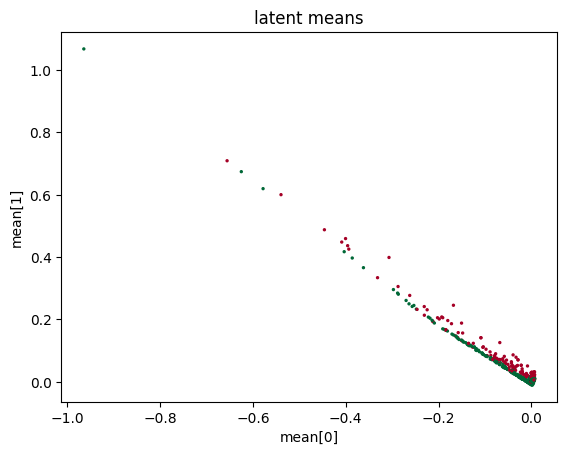

In [860]:
# latent_x_mean = model1(data_test)[0]
plt.scatter(mu[:, 0], mu[:, 1], c=y_test_tensor11, cmap='RdYlGn_r', s=2)
plt.title('latent means')
plt.ylabel('mean[1]')
plt.xlabel('mean[0]')
plt.show()
# tsne_plot(latent_x_mean, y_test, "raw.png")

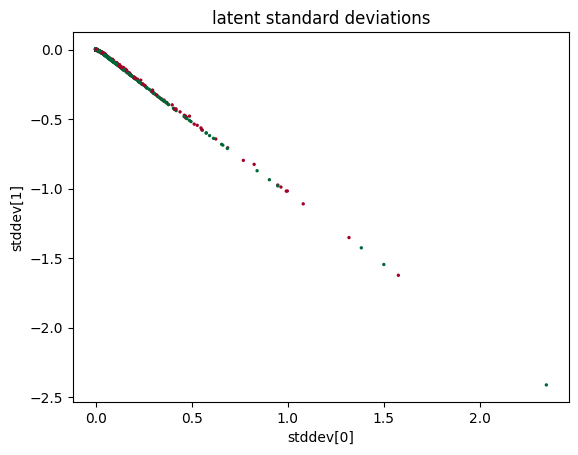

In [861]:
# latent_x_std = model1(data_test)[1]
plt.scatter(log_var[:, 0], log_var[:, 1], c=y_test_tensor11, cmap='RdYlGn_r', s=2)
plt.title('latent standard deviations')
plt.ylabel('stddev[1]')
plt.xlabel('stddev[0]')
plt.show()

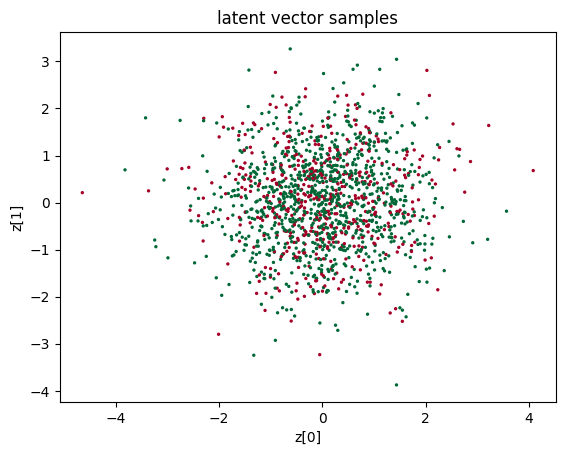

In [862]:
# latent_x = model1(data_test)[2]
plt.scatter(z[:, 0], z[:, 1], c=y_test_tensor11, cmap='RdYlGn_r', s=2)
plt.title('latent vector samples')
plt.ylabel('z[1]')
plt.xlabel('z[0]')
plt.show()